### K Nearest Neighbor 

Semi-supervised models

The nearest nieghor picks one of the unlabeled points and compared it to the labeled values 

The unlabeled point is compraed to the nearest labeled sample. Of the "three classes' for example the point is compared to one of the closes value of three classes to the unlabeled sample (k=1). 

which ever of the three classes closetest to the unlabedl value tells the program to assign the unlabeled value to that class


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import NearestNeighbors
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split  #An importatnt function 
from sklearn import metrics

In [3]:
#Loading Tris Dataset

data = load_iris()
print(data.data.shape)

#The feature of the data are the following: 
# Sepal Lengt, 
# Sepal Width, 
# Petal Length 
# Petal Width 

(150, 4)


([], [])

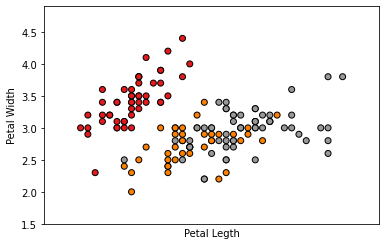

In [12]:
x = data.data[:,:2]
y = data.target 

x_min, x_max = x[:,0].min()-0.5, x[:,0].max()+0.5
y_min, y_max = x[:,1].min()-0.5, x[:,1].max()+0.5

#plot training point 

plt.scatter(x[:,0],x[:,1], c=y, cmap=plt.cm.Set1, edgecolors='k')
plt.xlabel('Sepal Legth')
plt.ylabel('Sepal Width')
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
plt.xticks(())
plt.xticks(())

([], [])

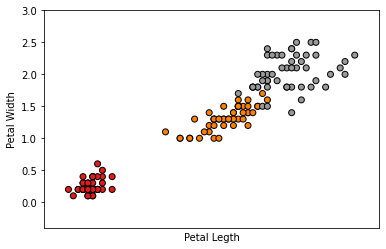

In [13]:
x = data.data[:,2:4]
y = data.target 

x_min, x_max = x[:,0].min()-0.5, x[:,0].max()+0.5
y_min, y_max = x[:,1].min()-0.5, x[:,1].max()+0.5

#plot training point 

plt.scatter(x[:,0],x[:,1], c=y, cmap=plt.cm.Set1, edgecolors='k')
plt.xlabel('Petal Legth')
plt.ylabel('Petal Width')
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
plt.xticks(())
plt.xticks(())

# This data set would be better to use because it is more organized 

Feature Reduction: 


PCA changes classes/ cluster to be orgainzed lniearly 

In [15]:
#Divide the data into training and testing set 

x = data.data
y = data.target  # target = label


x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state= 42)

#Defining the Model
nbr = NearestNeighbors(n_neighbors=3, algorithm="ball_tree")

# Used to train the model
nbr.fit(x_train)

NearestNeighbors(algorithm='ball_tree', n_neighbors=3)

In [19]:
# Finding the distance and indicies from each training points

distance, indices = nbr.kneighbors(x_test.reshape(-1,4),return_distance= True)

print(distance.shape)

print(distance)

print(indices)

(30, 3)
[[0.2236068  0.3        0.43588989]
 [0.33166248 0.38729833 0.46904158]
 [0.41231056 0.54772256 0.89442719]
 [0.2        0.24494897 0.33166248]
 [0.31622777 0.34641016 0.34641016]
 [0.28284271 0.3        0.3       ]
 [0.4472136  0.50990195 0.51961524]
 [0.36055513 0.46904158 0.51961524]
 [0.26457513 0.50990195 0.53851648]
 [0.14142136 0.26457513 0.28284271]
 [0.2236068  0.37416574 0.42426407]
 [0.14142136 0.2        0.26457513]
 [0.3        0.33166248 0.34641016]
 [0.1        0.17320508 0.2       ]
 [0.14142136 0.14142136 0.24494897]
 [0.26457513 0.37416574 0.42426407]
 [0.36055513 0.38729833 0.43588989]
 [0.17320508 0.24494897 0.26457513]
 [0.3        0.31622777 0.31622777]
 [0.42426407 0.43588989 0.46904158]
 [0.17320508 0.2236068  0.2236068 ]
 [0.14142136 0.24494897 0.28284271]
 [0.2        0.2236068  0.2236068 ]
 [0.33166248 0.37416574 0.38729833]
 [0.41231056 0.88317609 0.92736185]
 [0.36055513 0.36055513 0.37416574]
 [0.6        0.6164414  0.6244998 ]
 [0.2236068  0.31622

In [21]:
from sklearn.neighbors import KNeighborsClassifier

#Computes and Assigns the labels to the samples

knn_cl = KNeighborsClassifier(n_neighbors=3)
knn_cl.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [23]:
#Cheack the performace of the model 

classification_results = knn_cl.predict(x_test)

print(classification_results)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [24]:
# Find the posterriori proability of the model 

#we have 3 columns represnt the class 
# each row represents a coulmn 

knn_cl.predict_proba(x_test)

array([[0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.66666667, 0.33333333],
       [0.        , 1.        , 0.        ],
       [0.        , 0.33333333, 0.66666667],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [1.

In [26]:
# computing classification metrics

print(metrics.classification_report(classification_results,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Confusion Method 